In [1]:
import math
import io


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline


In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
cask = pd.read_csv('CASKSALESBYSTATECONFIDENCEINTERVAL.csv')

In [6]:
cask.info

<bound method DataFrame.info of    Sales
0     CA
1     MI
2     MI
3     CA
4     CA
5     CA
6     CA
7     CA
8     CA
9     CA
10    CA
11    MI
12    MI
13    MI
14    MI
15    MI
16    CA
17    CA
18    MI
19    CA
20    MI>

In [7]:
cask.head()

,Sales
0,CA
1,MI
2,MI
3,CA
4,CA


# This gives probability of sales in California or in Michigan

In [9]:
cask.Sales.value_counts(normalize=True) # 57% of sales in california 

CA    0.571429
MI    0.428571
Name: Sales, dtype: float64

# What can we infer about the population from this sample 

In [10]:
# using np.random.rand() we get a vector of random numbers between 
    # 0 and 1 in vector format 
np.random.rand(5)

array([0.83513893, 0.92268036, 0.27510621, 0.46383977, 0.61967289])

In [14]:
# np.random.rand give us random variables between 0 and 1 respectivly
# if the value is less than .57 it will return MI if it is not less than 
# .57 it will return CA this is 
np.where(np.random.rand(5) < .57, 'CA','MI')

array(['CA', 'MI', 'MI', 'CA', 'MI'], dtype='<U2')

In [15]:
#This takes everything puts into dataframe defines a function that takes 1000 samples
# this first line defines sample with and pulls all CA and 1000 samples
# second line makes a dataframe from sales column and finds all greater than CA will return true or falls if not ca its mi
def sample(CA, n=1000):
    return pd.DataFrame({'Sales': np.where(np.random.rand(n) < CA, 'CA','MI')})

In [16]:
# this is to see if the true fraction of CA sales is truely .57%
s = sample(.57,n=1000)

In [17]:
s.Sales.value_counts(normalize=True) # here we can see it is very close

CA    0.573
MI    0.427
Name: Sales, dtype: float64

In [22]:
# here we repeat the sampling process by putting everything in a data frame
# then we repeat the process 1000 times
# we take the sample and .57 value from CA's original fraction of sales 
#then we take the Sales.value_counts and give it 1000 iterations to give us a simulated poulation 
# this will show us if the sample and populaiton sales fractions are similar for sample as in population
dist = pd.DataFrame([sample(.57).Sales.value_counts(normalize=True) for i in range(1000)])

In [23]:
dist.head() # this is the first 5 simulations of the 1000 simulated events!

,CA,MI
Sales,0.553,0.447
Sales,0.581,0.419
Sales,0.547,0.453
Sales,0.569,0.431
Sales,0.581,0.419


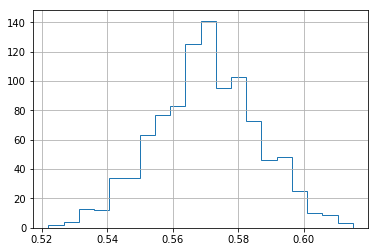

In [24]:
# here we graph a histogram
# this shows us that for a True CA fraction of sales of .57 we may obtain any sample proportion from .52 to .67
dist.CA.hist(histtype='step',bins=20)

# From this distribution is there a way to identify a likley range of CA sales fracitons?  This is known as confidence interval 

In [25]:
# here we make a funciton to simulate a sampling distribution for any True CA sales fraction
#First line we define a sampling dist and put CA from samples of 1000
#Second line we return a dataframe that sampeled the CA from n and gives the sales counts 
# then 1000 iterations of everything
def samplingdist(CA,n=1000):
    return pd.DataFrame([sample(CA,n).Sales.value_counts(normalize=True) for i in range(1000)])

In [26]:
# We want to get a 95% confidence interval 
# This will be inbetween 2.5% quantile and 97.5% quantile 
# We will look for when the True fraction for which a measured value of .57 lies at 2.5% quantile 
# and the true fraction for which our measured value lies at the 97.5 quantile
# Because those intervals are near the edge of the distribution on histogram we make a funciton to extract them here
def quantiles(CA,n=1000):
    dist = samplingdist(CA,n)
    return dist.CA.quantile(0.025), dist.CA.quantile(0.975)

#  This is how to find 95% confidence interval quantiles for oberserved value of .57

In [38]:
# here we imput values to find .57 on right side
quantiles(.54) 

(0.5099750000000001, 0.57)

In [48]:
# here we input values to find .57 on left side
quantiles(0.60) 

(0.569, 0.631)

#  For an observed sample of CA at .57 when sample size is 1000  the 95% confidence interval for the true Population function is .54 to .60

#  We can also say our point estimate is .57 and our margin of error is .03 at 95% confidence interval 

# We can reduce the margin of error by increasing the sample size like this below

In [49]:
# Here we create a sampling distribution for a True fraction of 50% and with 10000 samples
dist = samplingdist(0.50,10000)

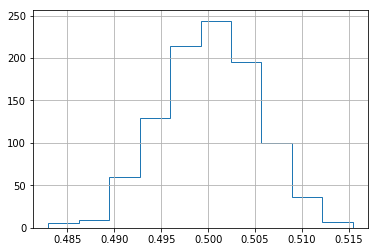

In [50]:
dist.CA.hist(histtype='step')

# Above we can see the tick marks representing margin of error is smaller now less than 1% this would have been sufficient to claim CA as the highest sales 


# Under general conditions we can see that the margin of error improves with square root of the number of samples

# Here we upload the actual population information and test the sales fractions as follows:

In [18]:
population = pd.read_csv('sales1.csv')

In [19]:
population.Sales.value_counts(normalize=True)

CA    0.570579
MI    0.429421
Name: Sales, dtype: float64

# As you can see the sales fractions are almost exactly the same as the sample distribution meaning that if we were to compute the confidence interval as we did for the sample distribution we would find similar confidence intervals